# Project 1: House Price Prediction Using Linear Regression

### 1.1 Importing Libraries

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

### 1.2 Importing the Dataset

In [88]:
housing_dataset = pd.read_csv("Data/boston.csv")

housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


This displays the headers along with the first few rows of the dataset for our reference.

In [89]:
housing_dataset.shape

(506, 14)

This gives us the dimensions of the dataset.

### 1.3 Data Visualization

In [90]:
plt.rcParams["figure.figsize"] = [8,6]
corr = housing_dataset.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


This shows the correlation between the different features of the dataset with correlation values ranging from -1 to 1.

<Axes: >

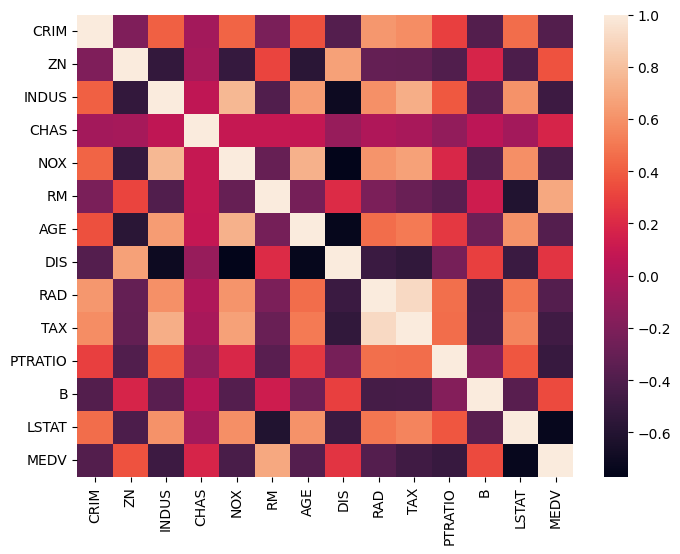

In [91]:
sns.heatmap(corr)

This shows a heat map of the correlation values to better visualize the correlation between the different features.

### 1.4 Divide Data into Features and Labels

In [92]:
X = housing_dataset.drop(["MEDV"], axis=1)
y = housing_dataset.filter(["MEDV"], axis=1)

In [93]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


Shows the dataframe of the first 5 rows of the features with the medv column removed.

In [94]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


This shows a set of labels for the dataset.

### 1.5 Divide Data into Training and Testing Sets

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This divdes the data into training and testing sets with 80% of the data used for training and 20% used for testing.

### 1.6 Training Linear Regression Algorithm

In [96]:
house_predictor = LinearRegression()
house_predictor.fit(X_train, y_train)
y_pred = house_predictor.predict(X_test)

This trains the linear regression algorithm using the training data that we set aside earlier.

### 1.7 Evaluating the Performance of a Trained Model

In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1890919658878416
Mean Squared Error: 24.291119474973538
Root Mean Squared Error: 4.928602182665339


The Mean Absolute Error is the mean of the absolute value of the errors between the predicted values and the actual values. This shows that there is an average error of $3.18 between the actual and predicted values for the MEDV column.

In [98]:
comparison_df = pd.DataFrame({'Actual': y_test.values.tolist(), 'Predicted': y_pred.tolist()})
comparison_df

,Actual,Predicted
0,[23.6],[28.9967236198249]
1,[32.4],[36.02556533567228]
2,[13.6],[14.816944045388304]
3,[22.8],[25.031979150399476]
4,[16.1],[18.769879915248143]
...,...,...
97,[17.9],[-0.16423699568664318]
98,[9.6],[13.684866815285854]
99,[17.2],[16.18359697171337]
100,[22.5],[22.276219993533378]


These are all the actual and predicted values for the MEDV column.

In [99]:
print(house_predictor.coef_)

[[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


This is a list of the linear regression coefficients.

### 1.8 Making Predictions on a Single Data Point

In [100]:
X_test.values[1].shape

(13,)

This is the shape of the feature vector at the first index which has a dimension of 1.

In [101]:
single_point = X_test.values[1].reshape(1, -1)
single_point.shape

(1, 13)

This converts the shape of the feature into a row vector.

In [102]:
house_predictor.predict(X_test.values[1].reshape(1, -1))

C:\Users\carte\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[36.02556534]])

The predicted value for the first data point is $36,020.00.

In [103]:
y_test.values[1]

array([32.4])

The acutal value for the first data point is $36,400.00. This means that there is an error of $380.00 between the actual and predicted values for the first data point.